### Visualisation Final Project

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from mpl_toolkits.mplot3d import *
import ipywidgets as widgets
from ipywidgets import interact
import mplcursors
import matplotlib.animation as animation
from IPython.display import HTML

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# Read datasets.
youtube_spotify = pd.read_csv('Spotify_Youtube.csv')
tiktok_19 = pd.read_excel('TikTok_songs_2019.xlsx')
tiktok_20 = pd.read_csv('TikTok_songs_2020.csv')
tiktok_21 = pd.read_csv('TikTok_songs_2021.csv')
tiktok_22 = pd.read_csv('TikTok_songs_2022.csv')
tiktok = pd.concat([tiktok_19, tiktok_20], ignore_index=True, sort=False)
tiktok = pd.concat([tiktok, tiktok_21], ignore_index=True, sort=False)
tiktok = pd.concat([tiktok, tiktok_22], ignore_index=True, sort=False)
tiktok 

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Shake It,Metro Station,53,Metro Station,68,0.618,0.9550,-3.836,1,4,0.0798,0.002210,0.000003,0.4860,0.7900,150.034,4,179947
1,Chinese New Year,SALES,61,SALES - EP,53,0.744,0.8450,-7.422,0,4,0.2530,0.759000,0.232000,0.1000,0.7490,75.221,4,160000
2,Baby I'm Yours,Breakbot,57,By Your Side,69,0.829,0.7920,-3.755,0,2,0.0668,0.726000,0.000006,0.1220,0.7580,118.050,4,215507
3,The Git Up,Blanco Brown,60,The Git Up,2,0.847,0.6780,-8.635,1,9,0.1090,0.066900,0.000000,0.2740,0.8110,97.984,4,200594
4,Say Hey (I Love You),Michael Franti & Spearhead,58,All Rebel Rockers,0,0.738,0.9830,-4.374,0,5,0.0855,0.038000,0.000006,0.1830,0.9570,92.998,4,235760
5,Falling for U,Peachy!,57,Falling for U,1,0.516,0.3580,-12.018,0,8,0.4240,0.743000,0.000001,0.0813,0.3970,79.509,4,124000
6,Shooting Stars,Bag Raiders,53,Bag Raiders (Deluxe),0,0.649,0.7160,-6.232,1,11,0.0445,0.087900,0.030000,0.0824,0.5030,124.968,4,235813
7,fast,Sueco,65,fast,0,0.877,0.5030,-10.269,0,7,0.2200,0.164000,0.013200,0.1020,0.5290,100.069,4,144000
8,On A Roll,Ashley O,43,On A Roll,58,0.736,0.8100,-6.354,1,5,0.0906,0.077000,0.000000,0.0523,0.3870,125.011,4,154448
9,Good Girls Bad Guys,Falling In Reverse,70,The Drug In Me Is You,64,0.474,0.9480,-2.592,1,3,0.1220,0.022300,0.000000,0.4300,0.6110,146.460,4,195373


In [5]:
# Merge Pandas DataFrames using left_on and right_on
tracks = pd.merge(youtube_spotify, tiktok, left_on="Track", right_on="track_name")
tracks = tracks.drop(['duration_ms','artist_name','instrumentalness','liveness','valence','tempo','track_name','album','danceability','energy','loudness','mode','key','speechiness','acousticness'], axis = 1)
tracks.sort_values(by='Stream')

# Deleting duplicate songs published by the same artists in the same album
tracks = tracks.drop_duplicates(subset=['Track','Album'], keep="last")
tracks = tracks.drop_duplicates(subset=['Track','Artist'], keep="last")

In [6]:
df = tracks
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\biril\AppData\Local\Temp\ipykernel_14000\343274222.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,artist_pop,track_pop,time_signature
Unnamed: 0,1.000000,0.028679,-0.096135,0.002829,0.095674,0.001457,0.089406,-0.009685,-0.025070,-0.084939,0.045195,-0.322517,-0.005346,0.155933,0.057336,0.229184,0.186915,0.121851,-0.052627
Danceability,0.028679,1.000000,0.053898,0.046763,0.141394,0.195603,-0.188145,-0.070288,-0.094334,0.377118,-0.244834,-0.162460,0.053676,0.080955,0.043671,0.034848,0.154515,0.045776,0.191146
Energy,-0.096135,0.053898,1.000000,0.065322,0.722026,0.039344,-0.557084,0.004789,0.108137,0.380989,0.070357,0.043433,0.039033,-0.018317,-0.015638,-0.056746,-0.002701,0.042476,0.053032
Key,0.002829,0.046763,0.065322,1.000000,0.007612,0.051300,-0.031836,0.043275,0.102487,0.046336,-0.031003,-0.036681,-0.060659,-0.038519,0.018789,-0.013374,-0.022704,-0.051738,0.044331
Loudness,0.095674,0.141394,0.722026,0.007612,1.000000,0.017083,-0.471966,-0.098761,0.067078,0.227226,0.055630,-0.023367,0.132417,0.131648,0.059627,0.092062,0.099670,0.065273,0.029550
Speechiness,0.001457,0.195603,0.039344,0.051300,0.017083,1.000000,-0.015787,-0.032405,-0.007307,0.010093,0.094090,-0.067481,-0.056209,-0.029694,0.006753,-0.069827,0.082200,-0.069602,0.026713
Acousticness,0.089406,-0.188145,-0.557084,-0.031836,-0.471966,-0.015787,1.000000,0.116438,-0.069720,-0.212302,-0.012196,-0.049530,-0.071277,-0.055854,-0.071899,0.029290,-0.056247,-0.015110,-0.098397
Instrumentalness,-0.009685,-0.070288,0.004789,0.043275,-0.098761,-0.032405,0.116438,1.000000,-0.003038,-0.046277,-0.006654,0.022594,-0.088163,-0.099373,-0.033901,-0.107755,-0.075428,0.018450,-0.108905
Liveness,-0.025070,-0.094334,0.108137,0.102487,0.067078,-0.007307,-0.069720,-0.003038,1.000000,-0.031344,0.001658,0.011369,-0.022480,0.024057,-0.013558,0.031273,0.032237,-0.032233,-0.038956
Valence,-0.084939,0.377118,0.380989,0.046336,0.227226,0.010093,-0.212302,-0.046277,-0.031344,1.000000,0.004850,-0.114312,-0.045074,-0.035055,0.027642,-0.060659,0.036036,0.095775,0.113994


In [7]:
#Removing features from dataframe.

features = tracks.columns[7:].tolist()
features.remove('Description')
features.remove('Channel')
features.remove('Comments')
features.remove('Url_youtube')
features.remove('Title')
features.remove('official_video')
features.remove('Stream')
features.remove('artist_pop')
features.remove('track_pop')
features.remove('Views')
features.remove('Likes')
features.remove('Licensed')
features.remove('time_signature')
features.remove('Tempo')
features.remove('Duration_ms')
features.remove('Key')
features.remove('Loudness')

In [8]:
size = 10
top_songs = tracks.sort_values(by='Stream')
songs = top_songs['Track'][:size]
artists = top_songs['Artist'][:size]
top_songs = top_songs.dropna()

### Task 1

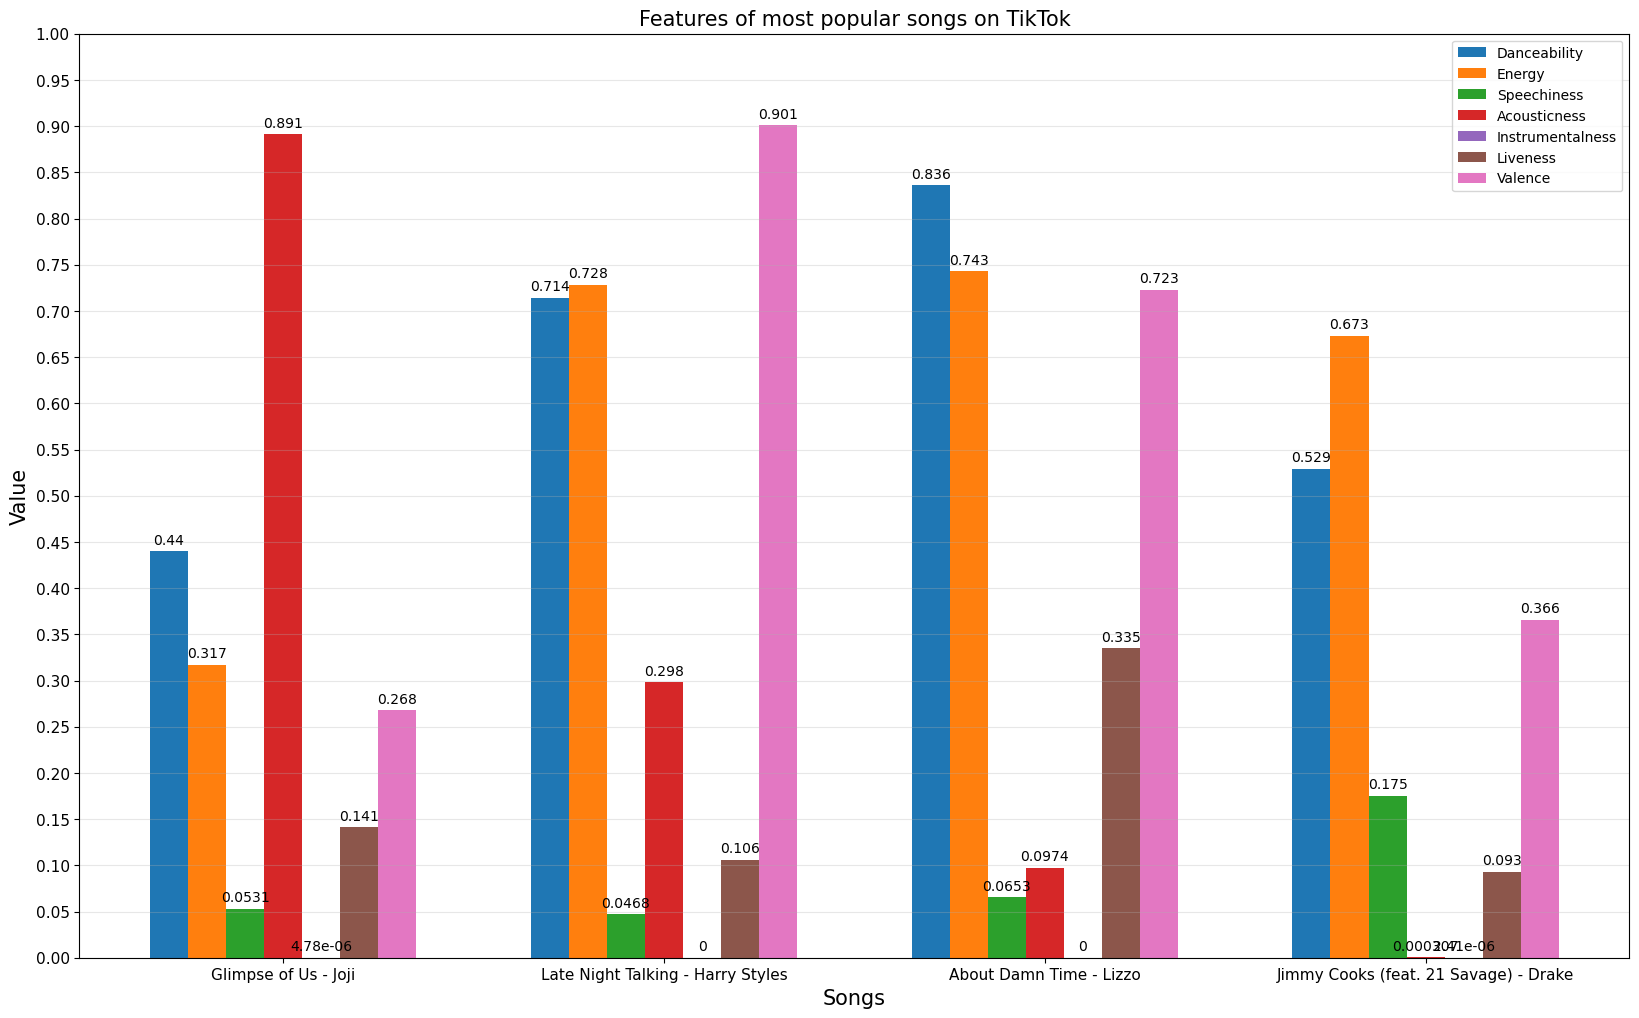

In [9]:
# However in this case we are only looking at a subset of the features available, we are excluding tempo, duration and loudness
# we also considered a radar chart, but, we don't think it behaves good with a lot of songs
size = 4
platform = 'TikTok'

if platform == 'TikTok':
    feature = 'track_pop'
elif platform == 'YouTube':
    feature = 'Likes'
elif platform == 'Spotify':
    feature = 'Stream'
    
top_songs = tracks.sort_values(by=feature,ascending=False).dropna()
songs = top_songs['Track'][:size]
artists = top_songs['Artist'][:size]
features_dict = {
    'Danceability': (top_songs['Danceability'][:size]),
    'Energy': (top_songs['Energy'][:size]),
    'Speechiness': (top_songs['Speechiness'][:size]),
    'Acousticness': (top_songs['Acousticness'][:size]),
    'Instrumentalness': (top_songs['Instrumentalness'][:size]),
    'Liveness': (top_songs['Liveness'][:size]),
    'Valence': (top_songs['Valence'][:size]),
}

x = np.arange(len(songs))  # the label locations
width = 0.1  # the width of the bars
multiplier = 0

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot()

for attribute, measurement in features_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value', size=15)
ax.set_xlabel('Songs', size=15)
ax.set_title('Features of most popular songs on '+platform, size=15)
ax.set_xticks(x + width*3, songs+' - '+artists)
ax.set_yticks(np.arange(0,1.05,0.05))
ax.legend(loc='upper right')
ax.yaxis.grid(alpha=0.3)
ax.tick_params(axis='both', which='major', labelsize=11)
#plt.xticks(rotation=0);

In [10]:
top_songs

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,artist_pop,track_pop,time_signature
598,18578,Joji,https://open.spotify.com/artist/3MZsBdqDrRTJih...,Glimpse of Us,SMITHEREENS,album,spotify:track:4ewazQLXFTDC8XvCbhvtXs,0.440,0.317,8.0,-9.258,0.0531,0.891000,0.000005,0.1410,0.2680,169.914,233456.0,https://www.youtube.com/watch?v=NgsWGfUlwJI,Joji - Glimpse of Us (Official Video),Joji,4.175120e+07,1757819.0,51965.0,"""Glimpse of Us"" - out now. Stream: https://joj...",True,True,7.699937e+08,85,97,3
630,19127,Harry Styles,https://open.spotify.com/artist/6KImCVD70vtIoJ...,Late Night Talking,Harry's House,album,spotify:track:1qEmFfgcLObUfQm0j1W2CK,0.714,0.728,10.0,-4.595,0.0468,0.298000,0.000000,0.1060,0.9010,114.996,177955.0,https://www.youtube.com/watch?v=4VaqA-5aQTM,Harry Styles - Late Night Talking (Official Vi...,HarryStylesVEVO,5.210705e+07,1296669.0,35766.0,"Official Video for ""Late Night Talking"" by Har...",True,True,5.406987e+08,91,93,4
535,16718,Lizzo,https://open.spotify.com/artist/56oDRnqbIiwx4m...,About Damn Time,Special,album,spotify:track:6HMtHNpW6YPi1hrw9tgF8P,0.836,0.743,10.0,-6.305,0.0653,0.097400,0.000000,0.3350,0.7230,108.965,191938.0,https://www.youtube.com/watch?v=IXXxciRUMzE,Lizzo - About Damn Time [Official Video],Lizzo Music,1.077979e+08,1505620.0,34922.0,Lizzo - About Damn Time [Official Video]\nDow...,True,True,5.718941e+08,81,92,4
55,13500,Drake,https://open.spotify.com/artist/3TVXtAsR1Inumw...,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind",album,spotify:track:3F5CgOj3wFlRv51JsHbxhe,0.529,0.673,0.0,-4.711,0.1750,0.000307,0.000002,0.0930,0.3660,165.921,218365.0,https://www.youtube.com/watch?v=4nyld2SqleU,Drake & 21 Savage - Jimmy Cooks,Drake,1.245441e+07,461655.0,14486.0,Official audio for Drake & 21 Savage “Jimmy Co...,False,True,4.132051e+08,95,92,4
616,18748,Elley Duhé,https://open.spotify.com/artist/67MNhiAICFY6Pw...,MIDDLE OF THE NIGHT,MIDDLE OF THE NIGHT,single,spotify:track:58HvfVOeJY7lUuCqF0m3ly,0.410,0.611,4.0,-8.271,0.0467,0.022800,0.000000,0.1160,0.0899,185.727,184448.0,https://www.youtube.com/watch?v=oSHzUD-uqKY,Elley Duhé - MIDDLE OF THE NIGHT (Official Video),Elley Duhé,6.238158e+07,1121875.0,27173.0,"""PIECES"" Available Now\nDownload/Stream: http:...",False,True,7.120390e+08,75,91,3
591,18255,Ruth B.,https://open.spotify.com/artist/2WzaAvm2bBCf4p...,Dandelions,Safe Haven,album,spotify:track:2eAvDnpXP5W0cVtiI0PUxV,0.609,0.692,1.0,-2.958,0.0259,0.015700,0.000000,0.0864,0.4540,116.959,233720.0,https://www.youtube.com/watch?v=y7tHZ3WeJAw,Ruth B. - Dandelions (Official Lyric Video),RuthBVEVO,1.003724e+07,274954.0,4205.0,"Official lyric video for ""Dandelions"" by Ruth ...",True,True,8.566147e+08,75,90,3
509,15938,The Neighbourhood,https://open.spotify.com/artist/77SW9BnxLY8rJ0...,Sweater Weather,I Love You.,album,spotify:track:2QjOHCTQ1Jl3zawyYOpxh6,0.612,0.807,10.0,-2.810,0.0336,0.049500,0.017700,0.1010,0.3980,124.053,240400.0,https://www.youtube.com/watch?v=GCdwKhTtNNw,The Neighbourhood - Sweater Weather (Official ...,TheNeighbourhoodVEVO,6.654596e+08,7172822.0,144768.0,"Official Video for ""Sweater Weather” by The Ne...",True,True,1.974875e+09,83,90,4
686,20324,Stephen Sanchez,https://open.spotify.com/artist/5XKFrudbV4IiuE...,Until I Found You,Easy On My Eyes,album,spotify:track:6VhuP99TE6gYNQRJIlAWFD,0.346,0.500,10.0,-6.097,0.0388,0.757000,0.000000,0.1890,0.1910,202.466,176667.0,https://www.youtube.com/watch?v=GxldQ9eX2wo,Stephen Sanchez - Until I Found You,StephenSanchezVEVO,8.763725e+07,1658120.0,22120.0,"Stream/Download my new EP, Easy On My Eyes: ht...",True,True,5.085675e+08,74,90,3
448,18075,Jack Harlow,https://open.spotify.com/artist/2LIk90788K0zvy...,First Class,Come Home The Kids Miss You,album,spotify:track:0wHFktze2PHC5jDt3B17DC,0.902,0.582,5.0,-5.902,0.1090,0.111000,0

In [17]:
# However in this case we are only looking at a subset of the features available, we are excluding tempo, duration and loudness

def f(Size, Platform):
    # Features. 
    fig = plt.figure(figsize=(9,5))
    ax = fig.add_subplot()
    size = Size
    platform = Platform

    if platform == 'TikTok':
        index = 'track_pop'
    elif platform == 'YouTube':
        index = 'Likes'
    elif platform == 'Spotify':
        index = 'Stream'

    top_songs = tracks.sort_values(by=index,ascending=False).dropna()
    songs = top_songs['Track'][:size]
    artists = top_songs['Artist'][:size]

    # Plot.
    features_dict = {}
    for feature in features:
        features_dict[feature] = top_songs[feature][:size]
    ax.boxplot(features_dict.values())
    ax.set_xticklabels(features_dict.keys())
    ax.set_title('Features distribution for the top '+ str(size) + ' songs on '+ platform);
    ax.yaxis.grid(alpha=0.3)
    
    ax.set_yticks(np.arange(0,1.05,0.1))
    ax.set_ylabel('Value', size=12)
    ax.set_xlabel('Features', size=12)

    fig.tight_layout()
    fig.canvas.draw()

interact(f, Size=widgets.IntSlider(min=1, max=len(tracks), step=1, value=10), Platform=['TikTok','Spotify','YouTube'])

interactive(children=(IntSlider(value=10, description='Size', max=494, min=1), Dropdown(description='Platform'…

<function __main__.f(Size, Platform)>

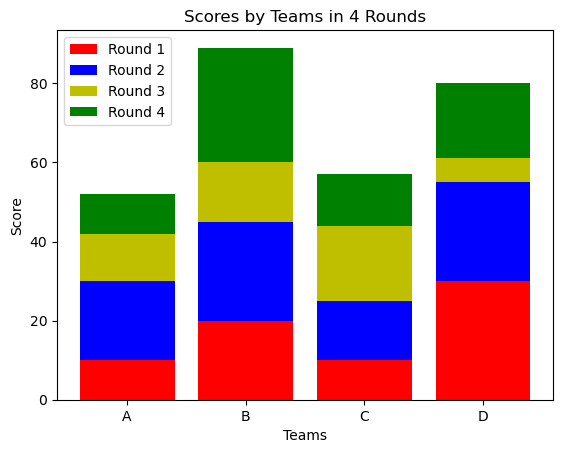

In [12]:

# importing package
import matplotlib.pyplot as plt
import numpy as np
 
# create data
x = ['A', 'B', 'C', 'D']
ax.invert_yaxis()
y1 = np.array([10, 20, 10, 30])
y2 = np.array([20, 25, 15, 25])
y3 = np.array([12, 15, 19, 6])
y4 = np.array([10, 29, 13, 19])
 
# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='y')
plt.bar(x, y4, bottom=y1+y2+y3, color='g')
plt.xlabel("Teams")
plt.ylabel("Score")
plt.legend(["Round 1", "Round 2", "Round 3", "Round 4"])
plt.title("Scores by Teams in 4 Rounds")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing fro

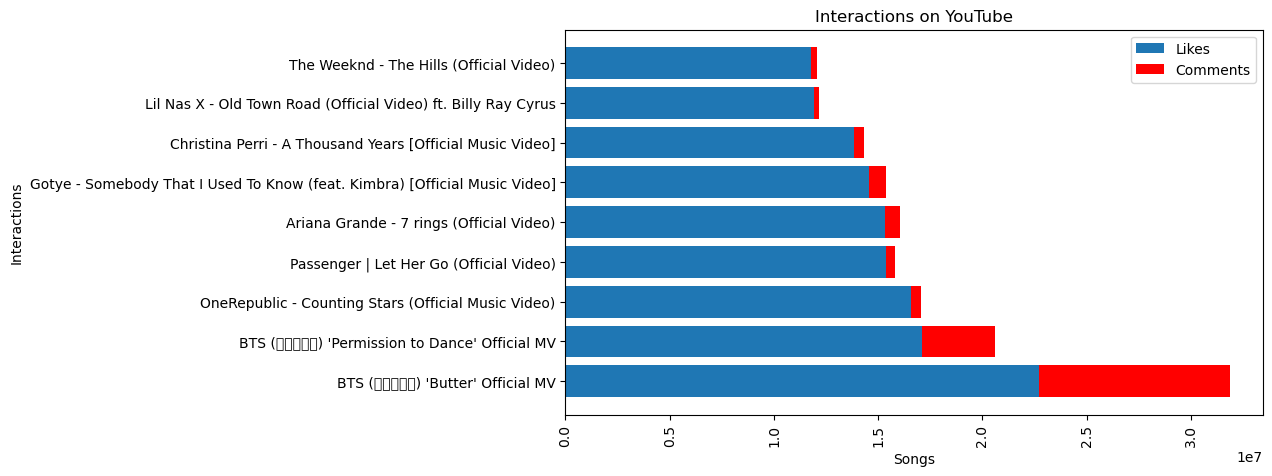

In [13]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()
size = 10
# create data
top_songs = tracks.sort_values(by='Likes',ascending=False).dropna()
top_songs = top_songs[1:size]
x = top_songs['Title'].to_list()
y1 = top_songs['Likes'].to_list()
y2 = top_songs['Comments'].to_list()
 
# plot bars in stack manner
ax.barh(x, y1);
ax.barh(x, y2, left=y1,color='red');
ax.set_xlabel("Songs");
ax.set_ylabel("Interactions");
ax.legend(["Likes", "Comments"]);
ax.set_title("Interactions on YouTube");
plt.xticks(rotation = 90);

## Task 3

In [14]:
tracks

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream,artist_pop,track_pop,time_signature
0,25,50 Cent,https://open.spotify.com/artist/3q7HBObVc0L8jN...,Disco Inferno,The Massacre,album,spotify:track:69bHJ9qs5FrUJbKP8xU8uZ,0.925,0.659,3.0,-4.763,0.2310,0.206000,0.000079,0.2790,0.7100,97.018,214227.0,https://www.youtube.com/watch?v=GNqYWkiBHHw,50 Cent - Disco Inferno (Official Music Video),50CentVEVO,3.982595e+07,382791.0,12038.0,REMASTERED IN HD!\n\nOfficial Music Video for ...,True,True,2.024772e+08,82,73,4
2,46,Coldplay,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,Paradise,Mylo Xyloto,album,spotify:track:6nek1Nin9q48AVZcWs9e9D,0.449,0.585,5.0,-6.761,0.0268,0.050900,0.000087,0.0833,0.2120,139.631,278719.0,https://www.youtube.com/watch?v=1G4isv_Fylg,Coldplay - Paradise (Official Video),Coldplay,1.665814e+09,8497224.0,343020.0,Coldplay - Paradise is taken from the album My...,True,True,9.272883e+08,72,75,4
4,2154,Sade,https://open.spotify.com/artist/47zz7sob9NUcOD...,Paradise,The Best of Sade,compilation,spotify:track:4tReFKumS5bcFahdXDiM1b,0.738,0.792,1.0,-7.873,0.0378,0.309000,0.390000,0.0679,0.9680,99.817,217467.0,https://www.youtube.com/watch?v=C0BLKudnyNo,Sade - Paradise - Official - 1988,SadeVEVO,2.771063e+07,143842.0,4873.0,Sade – Paradise\nDirector - Alex McDowell - Ju...,True,True,4.338485e+07,72,75,4
6,16815,George Ezra,https://open.spotify.com/artist/2ysnwxxNtSgbb9...,Paradise,Staying at Tamara's,album,spotify:track:38zwkK6TtTjIW9tpYBfZ3D,0.642,0.881,11.0,-3.537,0.0393,0.209000,0.000000,0.2100,0.9130,138.030,222045.0,https://www.youtube.com/watch?v=XOwihbur34E,George Ezra - Paradise (Official Video),GeorgeEzraVEVO,1.043852e+08,473813.0,13926.0,George Ezra - Paradise (Official Video)\nThe n...,True,True,2.983953e+08,72,75,4
8,19001,Bazzi,https://open.spotify.com/artist/4GvEc3ANtPPjt1...,Paradise,Soul Searching,album,spotify:track:0Rx0DJI556Ix5gBny6EWmn,0.844,0.644,11.0,-6.273,0.0479,0.082800,0.000000,0.1130,0.5910,122.061,169038.0,https://www.youtube.com/watch?v=x90WLRa5uGo,Bazzi - Paradise [Official Music Video],Bazzi,3.482375e+07,457464.0,6463.0,I’m bringing the dream to you on tour😭I absolu...,True,True,5.156237e+08,72,75,4
10,20442,Oscar Maydon,https://open.spotify.com/artist/3l9G1G9MxH6DaR...,Paradise,GXLE 3,album,spotify:track:5BRXdfXZ5il3XRqtOe9bfj,0.692,0.585,5.0,-9.181,0.0273,0.159000,0.000000,0.1690,0.8480,104.959,206000.0,https://www.youtube.com/watch?v=1mHlOkg7fRM,Oscar Maydon x El Chachito - Paradise [Officia...,Rancho Humilde,1.051022e+06,15990.0,333.0,Suscríbete: https://Rancho.lnk.to/RHYoutube\r\...,False,False,2.777926e+06,72,75,4
12,14562,BTS,https://open.spotify.com/artist/3Nrfpe0tUJi4K4...,My Universe,Music Of The Spheres,album,spotify:track:46HNZY1i7O6jwTA7Slo2PI,0.573,0.711,1.0,-6.268,0.0406,0.011400,0.000000,0.3280,0.4700,105.006,226198.0,https://www.youtube.com/watch?v=3YqPKLZF_WU,Coldplay X BTS - My Universe (Official Video),Coldplay,2.546584e+08,8867604.0,432726.0,"Coldplay X BTS - My Universe - The new single,...",True,True,8.832242e+08,87,83,4
13,70,Radiohead,https://open.spotify.com/artist/4Z8W4fKeB5Yxbu...,Creep,Pablo Honey,album,spotify:track:70LcF31zb1H0PyJoS1Sx1r,0.515,0.430,7.0,-9.935,0.0372,0.009700,0.000133,0.1290,0.1040,91.844,238640.0,https://www.youtube.com/watch?v=XFkzRNyygfk,Radiohead - Creep,Radiohead,7.634978e+08,4777393.0,147276.0,‘Creep’ is taken from ‘Pablo Honey’ out on XL ...,True,True,1.101855e+09,61,65,4
14,3856,TLC,https://open.spotify.com/artist/0TImkz4nPqjegt...,Creep,Crazysexycool,album,spotify:track:1aWV3uY3SIEZVbmv45oFWS,0.811,0.458,5.0,-9.688,0.0402,0.019300,0.000001,0.0526,0.7970,92.940,268533.0,https://www.youtube.com/watch?v=LlZydtG3xqI,TLC - Creep (Official HD Video),TLCVEVO,1.110703e+08,649654.0,22629.0,"Watch the official music video for ""Creep"" by 

In [15]:
def f(Number,Platform):
    platform = Platform

    if platform == 'TikTok':
        index = 'track_pop'
    elif platform == 'YouTube':
        index = 'Likes'
    elif platform == 'Spotify':
        index = 'Stream'

    top_songs = tracks.sort_values(by=index,ascending=False).dropna()
    top_songs = top_songs[1:Number]
    types = top_songs['Album_type'].unique()
    my_dict = {}
    for type in types:
        my_dict[type] = len(top_songs[top_songs['Album_type']==type])
    fig, ax = plt.subplots()
    ax.pie(my_dict.values(), labels=my_dict.keys(),autopct='%1.1f%%')
    ax.set_title('Album type for the top '+str(Number)+' songs on '+Platform)
    ax.legend()
    fig.tight_layout()
interact(f,Number=widgets.IntSlider(min=2, max=len(tracks), step=1, value=1), Platform=['Spotify','YouTube','TikTok'])

interactive(children=(IntSlider(value=2, description='Number', max=494, min=2), Dropdown(description='Platform…

<function __main__.f(Number, Platform)>